In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

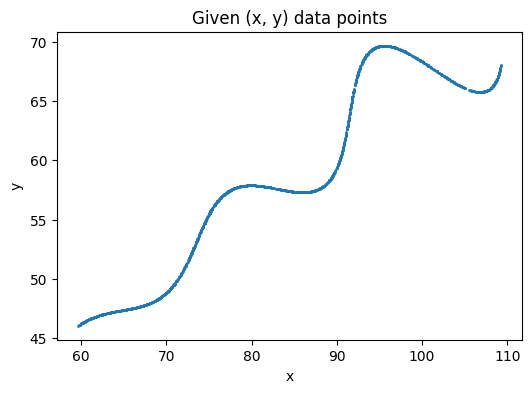

(1500, 2)


,x,y
0,88.364456,57.784378
1,74.283936,54.406780
2,60.256474,46.311462
3,82.134370,57.717567
4,101.036390,67.849340


In [2]:
df = pd.read_csv('/content/xy_data.csv')  # Adjust path if needed
plt.figure(figsize=(6,4))
plt.plot(df['x'], df['y'], '.', markersize=2)
plt.title("Given (x, y) data points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(df.shape)
df.head()


In [3]:
N = len(df)
t = np.linspace(6, 60, N)
abs_t = np.abs(t)
s03 = np.sin(0.3*t)

def l1_loss(theta_deg, M):
    th = np.deg2rad(theta_deg)
    em = np.exp(M*abs_t)
    base_x = t*np.cos(th) - em*s03*np.sin(th)
    base_y = 42 + t*np.sin(th) + em*s03*np.cos(th)

    # Best X (median residual)
    X = np.clip(np.median(df['x'] - base_x), 0, 100)
    pred_x = base_x + X
    pred_y = base_y

    l1 = np.mean(np.abs(pred_x - df['x']) + np.abs(pred_y - df['y']))
    return l1, X


In [4]:
best = (1e9, None, None, None)

for th in np.linspace(0, 50, 101):  # 0.5° steps
    for M in np.linspace(-0.05, 0.05, 41):  # 0.0025 steps
        l1, X = l1_loss(th, M)
        if l1 < best[0]:
            best = (l1, th, M, X)

best


(np.float64(25.244030863443626),
 np.float64(28.0),
 np.float64(0.020000000000000004),
 np.float64(54.90208299784564))

In [5]:
best_l1, th0, M0, X0 = best

for th in np.linspace(th0-1.0, th0+1.0, 41):
    if 0 <= th <= 50:
        for M in np.linspace(M0-0.01, M0+0.01, 81):
            if -0.05 <= M <= 0.05:
                l1, X = l1_loss(th, M)
                if l1 < best_l1:
                    best_l1, th0, M0, X0 = l1, th, M, X

print("Refined best values:")
print(f"θ = {th0:.3f}°, M = {M0:.5f}, X = {X0:.5f}, L1 = {best_l1:.3f}")


Refined best values:
θ = 28.100°, M = 0.02125, X = 54.89815, L1 = 25.243


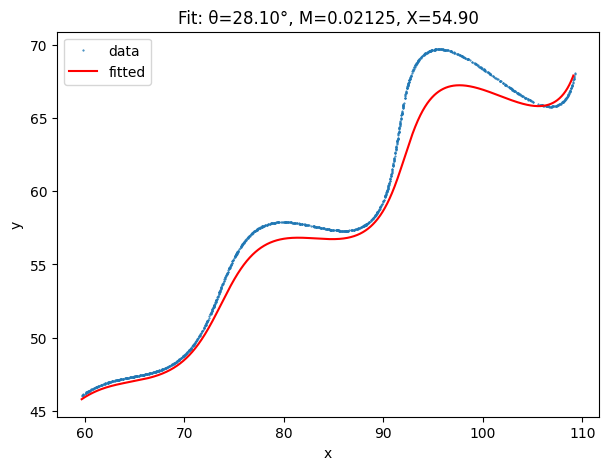

In [6]:
th = np.deg2rad(th0)
em = np.exp(M0*np.abs(t))

pred_x = t*np.cos(th) - em*s03*np.sin(th) + X0
pred_y = 42 + t*np.sin(th) + em*s03*np.cos(th)

plt.figure(figsize=(7,5))
plt.plot(df['x'], df['y'], '.', markersize=1, label='data')
plt.plot(pred_x, pred_y, '-', color='red', label='fitted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Fit: θ={th0:.2f}°, M={M0:.5f}, X={X0:.2f}")
plt.show()
